In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r"C:\Users\mitra\Downloads\housing_data.csv")
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1460.0,729.500000,421.610009,0.0,364.75,729.5,1094.25,1459.0
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [5]:
df.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [6]:
df.drop('Unnamed: 0', axis=1 , inplace= True)

In [7]:
df.drop(['MSZoning','Street','Alley','LandContour','Utilities','PoolArea', 'PoolQC'], axis=1, inplace=True)

In [8]:
df.drop(['BldgType','3SsnPorch','ScreenPorch','Fence','MiscFeature','MiscVal','SaleType'] , axis=1 , inplace=True)

In [9]:
df.drop(['LandSlope','Condition2','GarageQual','GarageCond','PavedDrive'] , axis=1 , inplace=True)

In [10]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleCondition,SalePrice
0,SC60,65,8450,Reg,Inside,CollgCr,Norm,2Story,7,5,...,RFn,2,548,0,61,0,Feb,2008,Normal,208500
1,SC20,80,9600,Reg,FR2,Veenker,Feedr,1Story,6,8,...,RFn,2,460,298,0,0,May,2007,Normal,181500
2,SC60,68,11250,IR1,Inside,CollgCr,Norm,2Story,7,5,...,RFn,2,608,0,42,0,Sep,2008,Normal,223500
3,SC70,60,9550,IR1,Corner,Crawfor,Norm,2Story,7,5,...,Unf,3,642,0,35,272,Feb,2006,Abnorml,140000
4,SC60,84,14260,IR1,FR2,NoRidge,Norm,2Story,8,5,...,RFn,3,836,192,84,0,Dec,2008,Normal,250000


CATEGORIZE THE FEATURE DEPENDING ON THEIR DATASETS (OBJECT, INT, FLOAT)

In [11]:
obj = (df.dtypes == 'object')
obj_col = list(obj[obj].index)
print("Categorical Variables : " , len(obj_col))

Numb = (df.dtypes == 'int64')
Numb_col = list(Numb[Numb].index)
print("Integer Variables : " , len(Numb_col))

Flt = df.dtypes == 'float64'
Flt_col = list(Flt[Flt].index)
print("Float Variables : " , len(Flt_col))

Categorical Variables :  30
Integer Variables :  30
Float Variables :  1


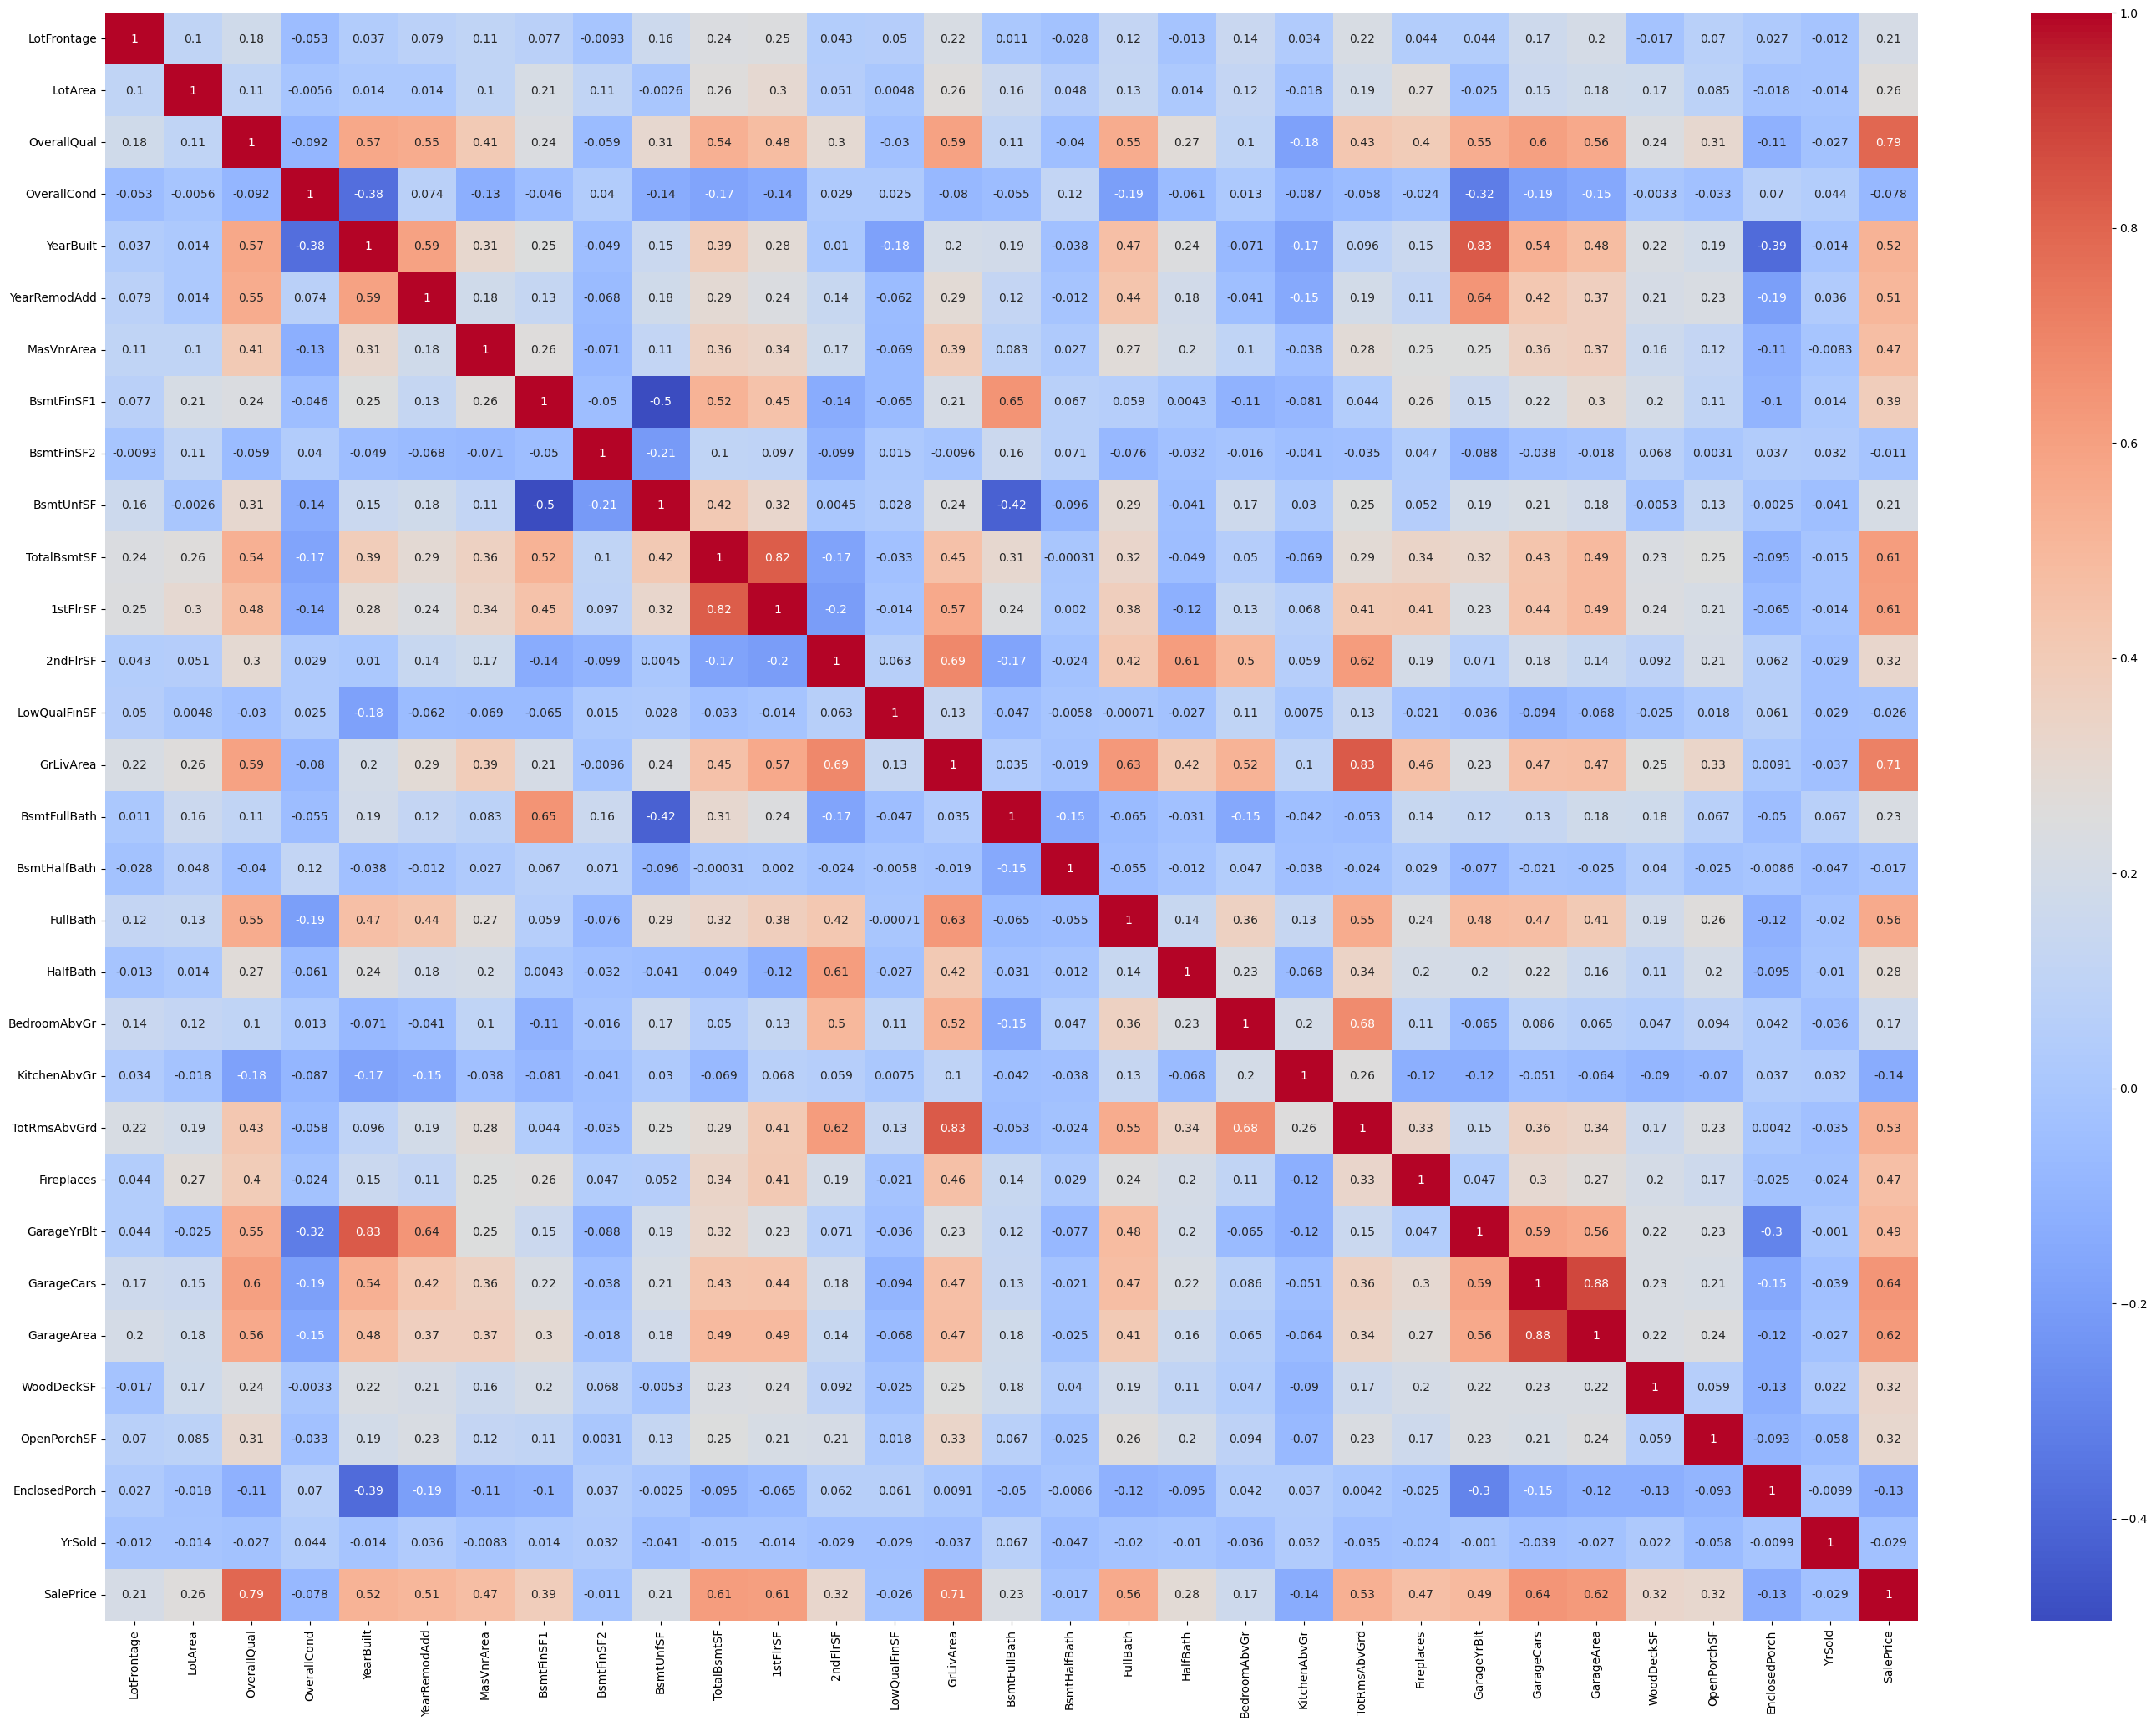

In [12]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(35,25))
sns.heatmap(numeric_df.corr() , annot= True, cmap='coolwarm')
plt.show()

In [13]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [14]:
for col in df.columns:
    if df[col].dtypes == 'int64':
        df[col].fillna(df[col].mean())
    elif df[col].dtypes =='float64':
        df[col].fillna(df[col].mean())
        
    

TO ANALYZE DIFFERENT CATEGORICAL FEATURES , WE DRAW BARPLOT

C:\Users\mitra\AppData\Local\Temp\ipykernel_14068\3809792844.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=obj_col ,  y= unique_val , palette='viridis')


<Axes: title={'center': 'No. of Unique Values'}>

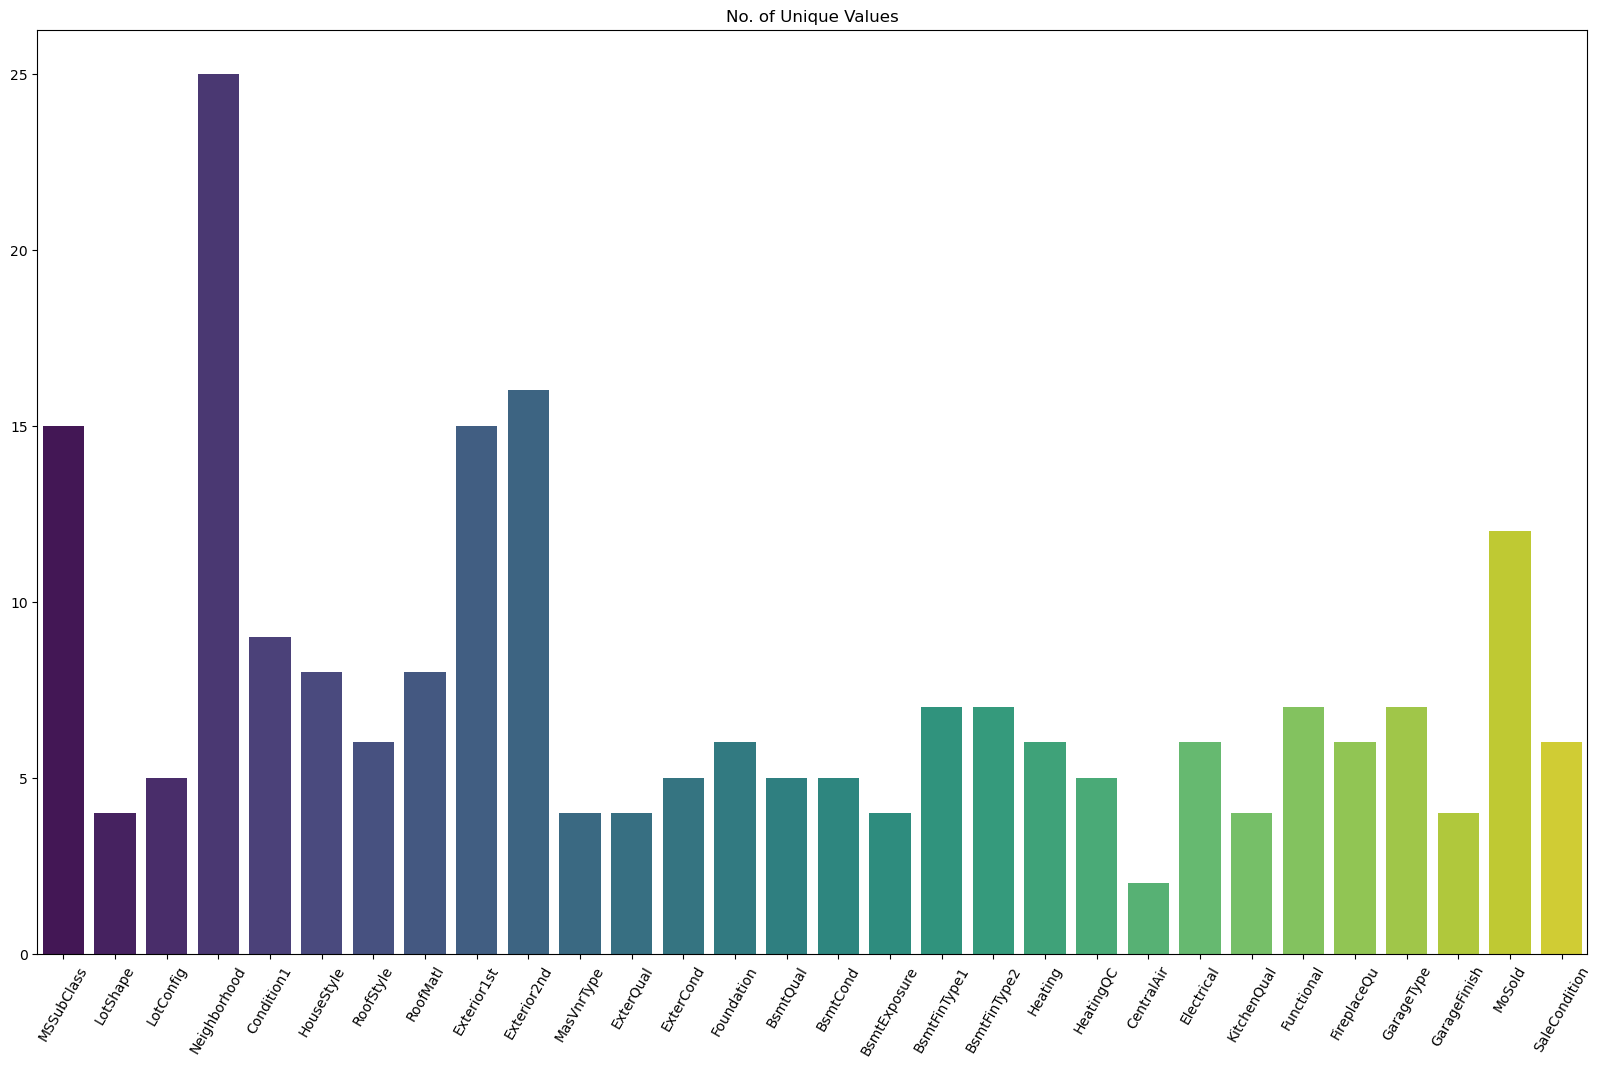

In [15]:
unique_val = []
for col in df[obj_col]:
    unique_val.append(df[col].unique().size)
plt.figure(figsize=(20,12))
plt.title("No. of Unique Values")
plt.xticks(rotation = 60)
sns.barplot(x=obj_col ,  y= unique_val , palette='viridis')


NEIGHBORHOOD HAS MAXIMUM UNIQUE CATEGORIES, BUT OTHER HAS LESS THAN THAT..

In [18]:
df['Price_pr_Sqft'] = df['SalePrice'] / df['GrLivArea']
df['Property_Age'] = df['YrSold'] - df['YearBuilt']
df['Renovated_Age'] = df['YrSold'] - df['YearRemodAdd']
df['Total_Bathroom'] = df['FullBath']+ df['BsmtFullBath'] + 0.5*(df['HalfBath']+df['BsmtHalfBath'])
df['Living_to_Lot_Ratio'] = df['GrLivArea'] / df['LotArea']
df['Total_Bedroom'] = df['BedroomAbvGr']

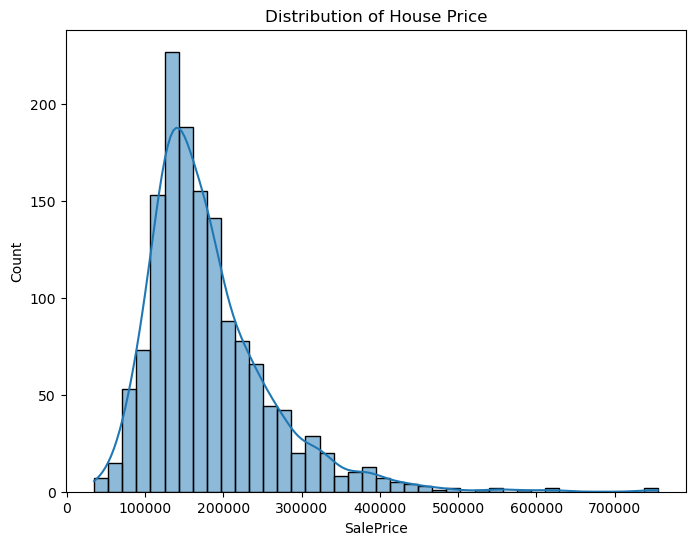

In [21]:
features = ['Total_Bedroom','Total_Bathroom','GrLivArea','SalePrice']
data = df[features]

plt.figure(figsize=(8,6))
sns.histplot(data['SalePrice'] , kde=True , bins=40)
plt.title("Distribution of House Price")
plt.show()

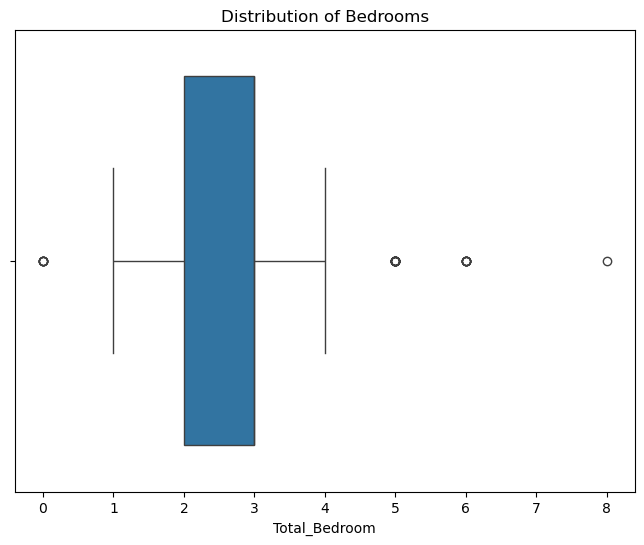

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Total_Bedroom'])
plt.title("Distribution of Bedrooms")
plt.show()

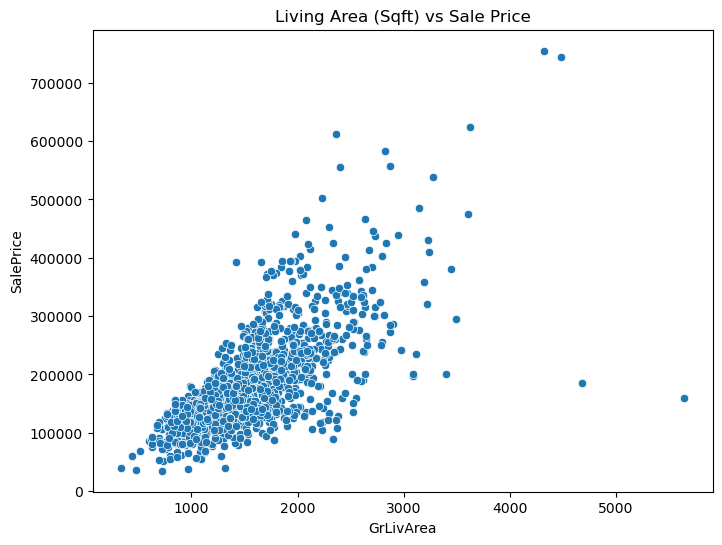

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea' , y='SalePrice', data=data)
plt.title("Living Area (Sqft) vs Sale Price")
plt.show()

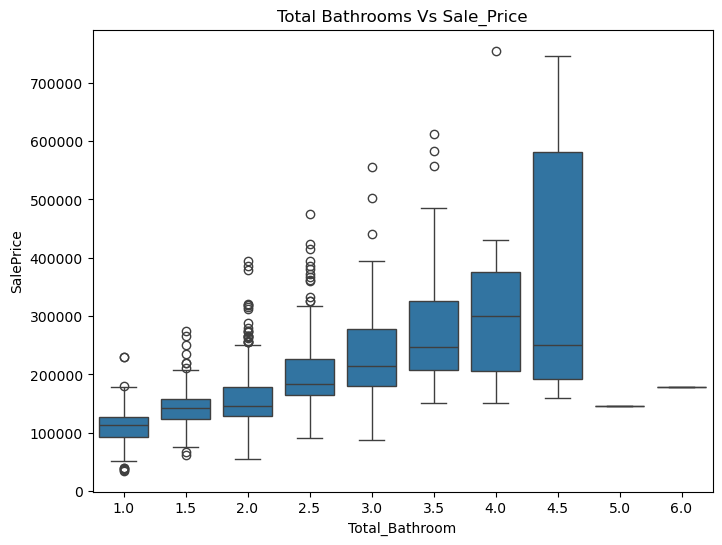

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Total_Bathroom'] , y=data['SalePrice'] , data=data)
plt.title("Total Bathrooms Vs Sale_Price")
plt.show()

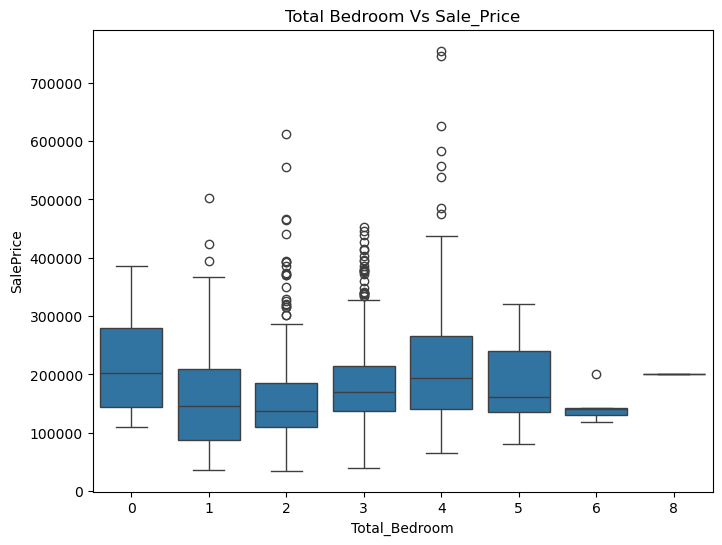

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Total_Bedroom'], y=data['SalePrice'], data=data)
plt.title("Total Bedroom Vs Sale_Price")
plt.show()

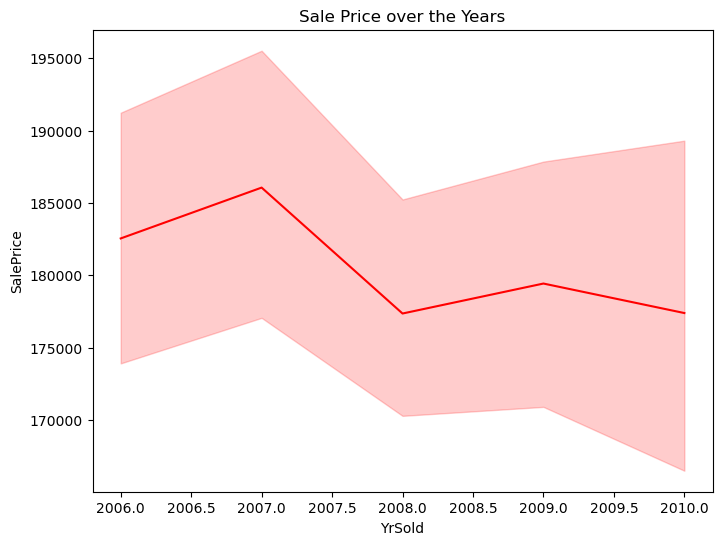

In [54]:
plt.figure(figsize=(8,6))
sns.lineplot(x='YrSold' , y= 'SalePrice', data = df , color ='red')
plt.title("Sale Price over the Years")
plt.show()

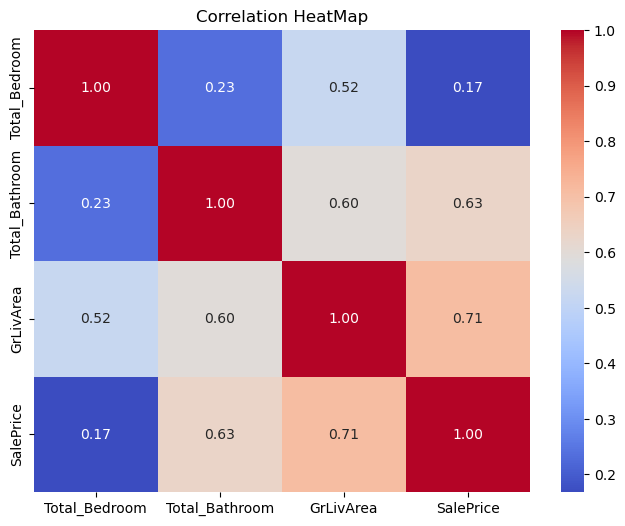

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm' , fmt='.2f')
plt.title("Correlation HeatMap")
plt.show()

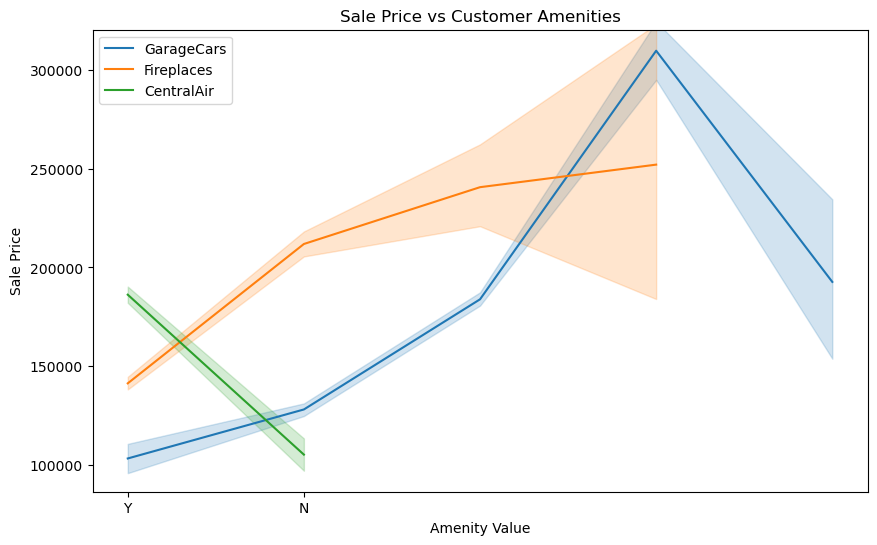

In [66]:
amenities = ['GarageCars', 'Fireplaces','CentralAir']

plt.figure(figsize=(10,6))
for amenity in amenities:
    sns.lineplot(x=data1[amenity], y=df['SalePrice'], label=amenity)
    
plt.title("Sale Price vs Customer Amenities")
plt.xlabel("Amenity Value")
plt.ylabel("Sale Price")
plt.legend()
plt.show()

In [49]:
X= df[['Total_Bedroom','Total_Bathroom','GrLivArea']]
y=df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape

(1168, 3)

In [52]:
lr = LogisticRegression()
lr.fit (X_train , y_train)

C:\Users\mitra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_pred = lr.predict(X_test)